In [2]:
import brkraw as brk

raw = brk.load('./RawData/20200722_161733_LWPO_Phantom_1_3.zip')

In [1]:
import brkraw as brk

raw = brk.load('/Volumes/My Passport/MRData/PV6/Phantoms/20200722_161733_LWPO_Phantom_1_3')

In [2]:
raw.info()

Paravision 6.0.1
----------------
UserAccount:	shihlab
Date:		2020-07-22
Researcher:	1
Subject ID:	LWPO_Phantom
Session ID:	NMR end
Study ID:	3
Date of Birth:	22 Jul 2020
Sex:		unknown
Weight:		0.001 kg
Subject Type:	Other
Position:	Supine		Entry:	HeadFirst

[ScanID]	Sequence::Protocol::[Parameters]
[001]	Bruker:FLASH::0_Localizer_GOP::
	[ TR: 100 ms, TE: 2.63 ms, pixelBW: 292.97 Hz, FlipAngle: 30 degree]
    [01] dim: 2D, matrix_size: 256 x 256 x 3, fov_size: 50 x 50 (unit:mm)
         spatial_resol: 0.195 x 0.195 x 1.000 (unit:mm), temporal_resol: 12800.000 (unit:msec)
[002]	Bruker:FLASH::0_Localizer_GOP::
	[ TR: 100 ms, TE: 2.63 ms, pixelBW: 292.97 Hz, FlipAngle: 30 degree]
    [01] dim: 2D, matrix_size: 256 x 256 x 3, fov_size: 50 x 50 (unit:mm)
         spatial_resol: 0.195 x 0.195 x 1.000 (unit:mm), temporal_resol: 12800.000 (unit:msec)
[003]	Bruker:FLASH::0_Localizer_GOP::
	[ TR: 100 ms, TE: 2.63 ms, pixelBW: 292.97 Hz, FlipAngle: 30 degree]
    [01] dim: 2D, matrix_size: 256 x 

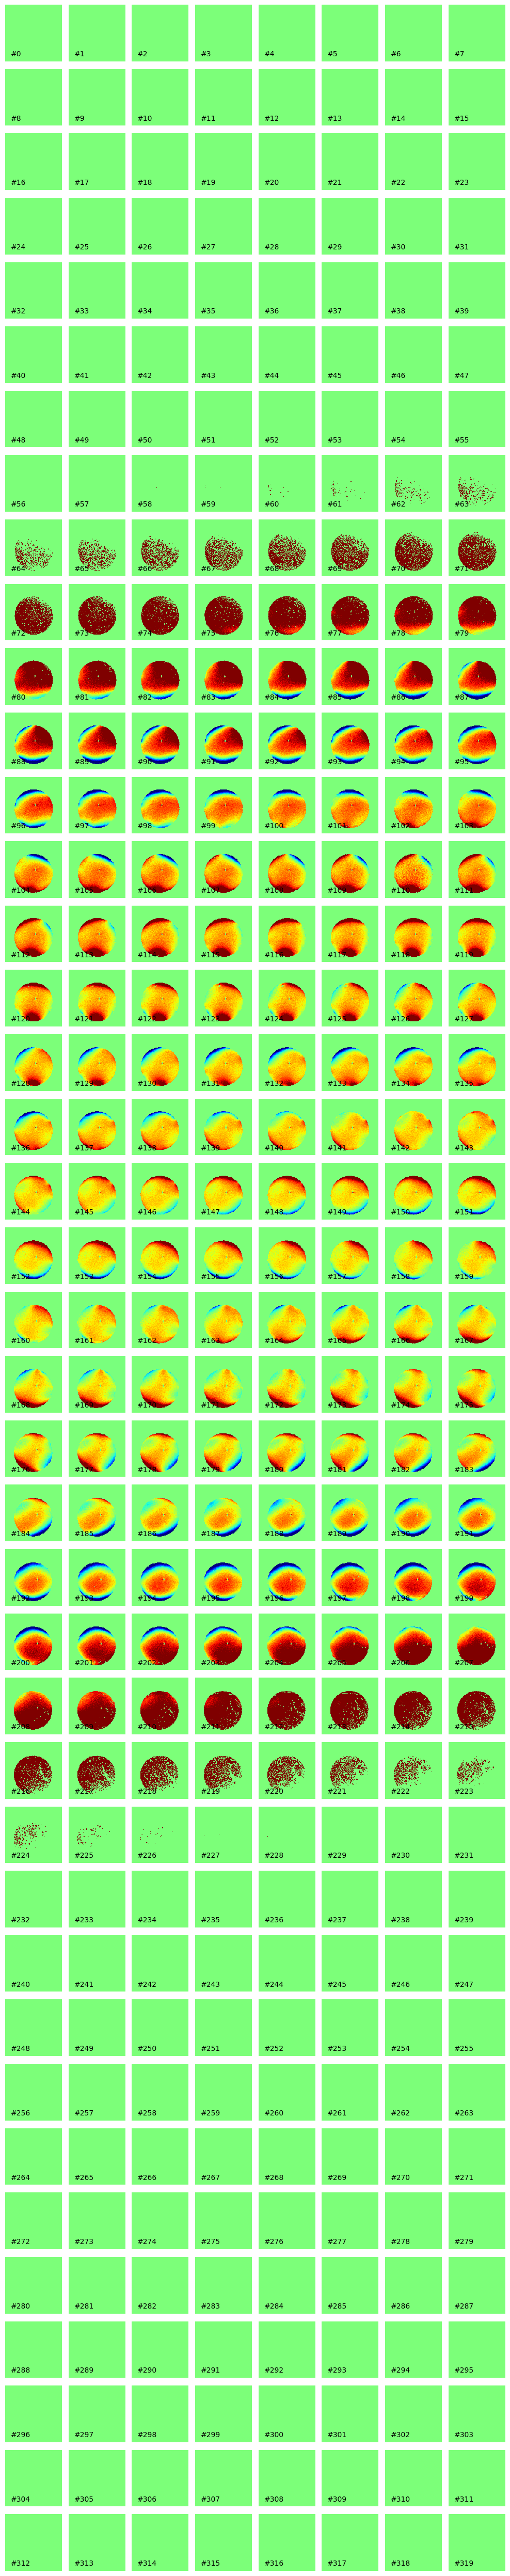

In [7]:
import numpy as np
import matplotlib.pyplot as plt
nii = raw.get_niftiobj(17, 1, slope=True, offset=True)
data = np.asarray(nii.dataobj)

divider = 5

fig, ax = plt.subplots(40, 8, figsize=[10, 50], dpi=100)
ax = ax.flatten()
for i, img in enumerate(data):
    ax[i].imshow(img.T, cmap='jet', origin='lower', 
                 vmin=data.max()*-1/divider, vmax=data.max()/divider)
    ax[i].axis('off')
    ax[i].set_aspect(1)
    ax[i].text(12, 12, f'#{i}')
plt.tight_layout()

In [8]:
import matplotlib.patches as patches
import matplotlib.lines as mlines

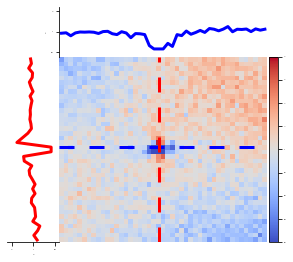

In [34]:
figsize = np.array([1.3 * 1.3/1.35, 8/9+0.2])*3
fig = plt.figure(figsize=figsize, constrained_layout=False)
img = data[143,50:90,40:85]
img -= img[:10, :10].mean()

widths = [0.25, 1, 0.01, 0.04]
heights = [0.3*8/9, 1]
vlim = [-40, 40]

gs = fig.add_gridspec(nrows=2, ncols=4, 
                      left=0, right=1,
                      bottom=0, top=1,
                      wspace=0, hspace=0,
                      width_ratios=widths, height_ratios=heights)
ax3 = fig.add_subplot(gs[1, 1])
ax1 = fig.add_subplot(gs[0, 1], sharex=ax3)
ax2 = fig.add_subplot(gs[1, 0], sharey=ax3)
cax = fig.add_subplot(gs[1, 3])

ax1.plot(np.arange(0, img.shape[1]), img[20, :], color='b', linewidth=3)
ax2.plot(img[:, 21], np.arange(0, img.shape[0]), color='r', linewidth=3)
im = ax3.imshow(img, cmap='coolwarm', origin='lower', 
                vmin=vlim[0], vmax=vlim[1])
rect = patches.Rectangle((3,2),4,1,linewidth=0,edgecolor='none',facecolor='k')
xmin, xmax = ax3.get_xlim()
ymin, ymax = ax3.get_ylim()
vline = mlines.Line2D([xmin,xmax], [20,20], color='b', linestyle='--', dashes=(5, 5), linewidth=3)
hline = mlines.Line2D([21,21], [ymin,ymax], color='r', linestyle='--', dashes=(5, 5), linewidth=3)
#ax3.add_patch(rect)
#ax3.text(0.5, 4, '200 $\mu$m', fontsize=40)
ax3.add_line(vline)
ax3.add_line(hline)

fig.colorbar(im, cax=cax, orientation='vertical')
ax1.tick_params(axis='y', labelsize=0, pad=3)
ax1.set_ylabel('Hz', fontsize=0)
ax1.get_xaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylim([-60, 60])
start, end = ax1.get_ylim()
ax1.yaxis.set_ticks(np.arange(-50, 51, 50))

ax2.tick_params(axis='x', labelsize=0, pad=3)
ax2.set_xlabel('Hz', fontsize=0)
ax2.get_yaxis().set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlim([-60, 60])
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(-50, 51, 50))
ax2.invert_xaxis()
ax3.axis('off')

cax.tick_params(axis='y', labelsize=0, pad=3)
#cax.set_ylabel('Hz', fontsize=40)
#cax.yaxis.set_ticks(np.arange(-40, 41, 40))
#cax.yaxis.set_label_coords(2,0.5)

plt.savefig('FieldMap_noScaleBar.tif', transparent=True, dpi=300)

In [233]:
mlines.Line2D?

In [225]:
0.2

0.2

In [3]:
nii = raw.get_niftiobj(17, 1, slope=True, offset=True)
data = np.asarray(nii.dataobj)

In [4]:
data.shape

(320, 128, 128)

/opt/apps/pyenv/1.2.17/versions/3.7.6/envs/camri-tool/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


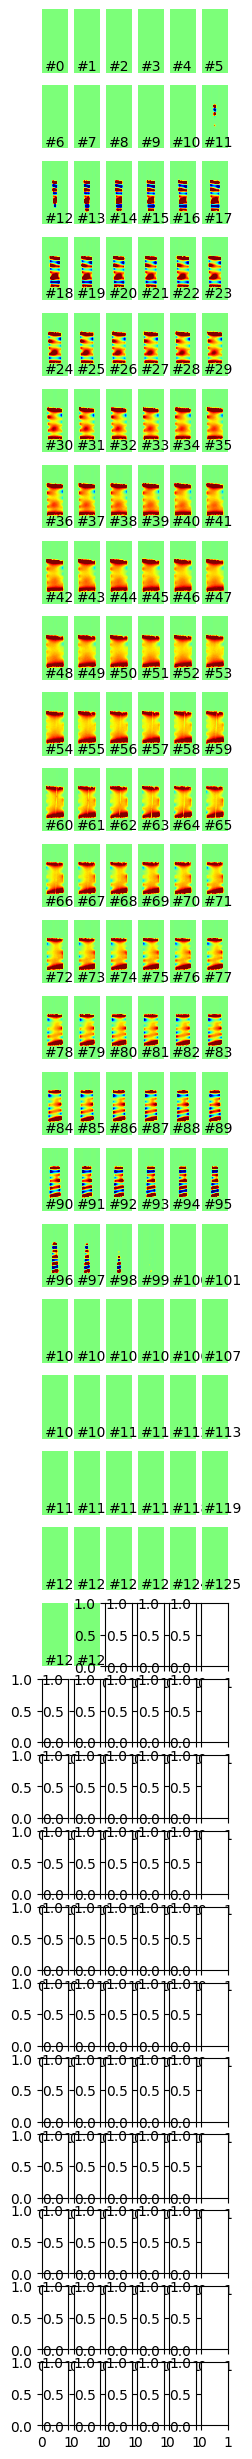

In [7]:
nii = raw.get_niftiobj(17, 1, slope=True, offset=True)
data = np.asarray(nii.dataobj)

divider = 5

fig, ax = plt.subplots(32, 6, figsize=[6*128/320, 32], dpi=100)
ax = ax.flatten()
for i, img in enumerate(data.T):
    ax[i].imshow(img.T, cmap='jet', origin='lower', 
                 vmin=data.max()*-1/divider, vmax=data.max()/divider)
    ax[i].axis('off')
    ax[i].set_aspect(1)
    ax[i].text(12, 12, f'#{i}')
plt.tight_layout()

In [10]:
import matplotlib.patches as patches
import matplotlib.lines as mlines

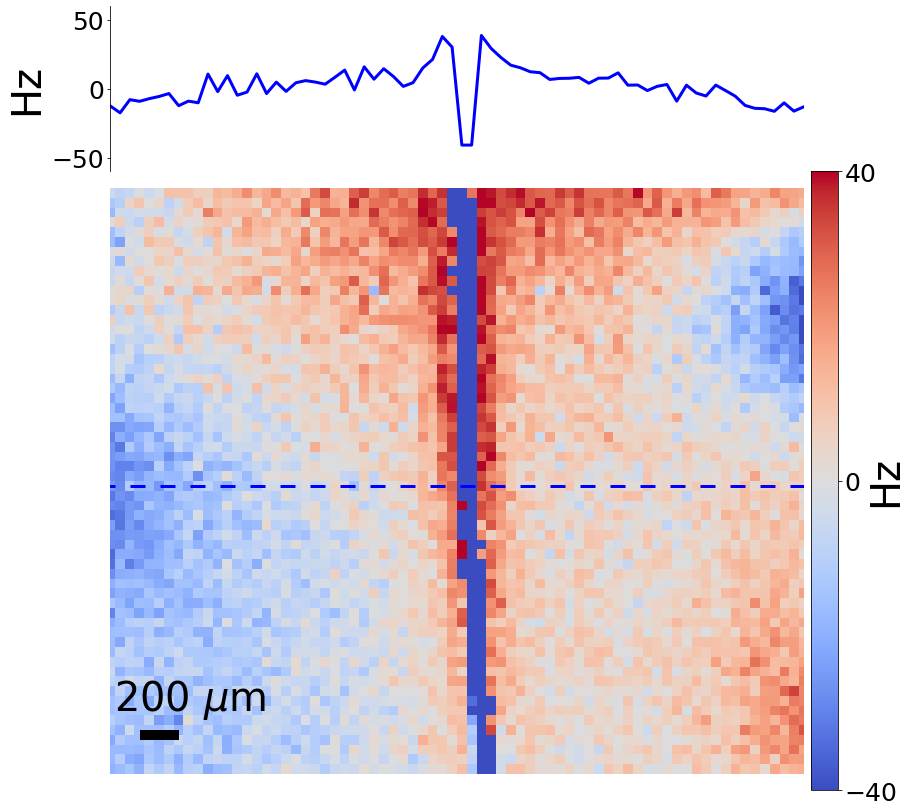

In [47]:
figsize = np.array([1.3 * 1.3/1.35, 8/9+0.2])*10
fig = plt.figure(figsize=figsize, constrained_layout=False)
img = data[100:160,32:104,62]
img -= img[:10, :10].mean()

widths = [0.25, 1, 0.01, 0.04]
heights = [0.3*8/9, 1]
vlim = [-40, 40]

gs = fig.add_gridspec(nrows=2, ncols=4, 
                      left=0, right=1,
                      bottom=0, top=1,
                      wspace=0, hspace=0,
                      width_ratios=widths, height_ratios=heights)
ax3 = fig.add_subplot(gs[1, 1])
ax1 = fig.add_subplot(gs[0, 1], sharex=ax3)
# ax2 = fig.add_subplot(gs[1, 0], sharey=ax3)

cax = fig.add_subplot(gs[1, 3])

ax1.plot(np.arange(0, img.shape[1]), img[20, :], color='b', linewidth=3)
ax2.plot(img[:, 21], np.arange(0, img.shape[0]), color='r', linewidth=3)
im = ax3.imshow(img, cmap='coolwarm', 
                vmin=vlim[0], vmax=vlim[1])
rect = patches.Rectangle((3,55),4,1,linewidth=0,edgecolor='none',facecolor='k')
xmin, xmax = ax3.get_xlim()
ymin, ymax = ax3.get_ylim()

vline = mlines.Line2D([xmin,xmax], [30,30], color='b', linestyle='--', dashes=(5, 5), linewidth=3)
# hline = mlines.Line2D([21,21], [ymin,ymax], color='r', linestyle='--', dashes=(5, 5), linewidth=3)
ax3.add_patch(rect)
ax3.text(0.4, 53, '200 $\mu$m', fontsize=40)
ax3.add_line(vline)
# ax3.add_line(hline)

fig.colorbar(im, cax=cax, orientation='vertical')
ax1.tick_params(axis='y', labelsize=25, pad=3)
ax1.set_ylabel('Hz', fontsize=40)
ax1.get_xaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlim([0, 71])
ax1.set_ylim([-60, 60])
start, end = ax1.get_ylim()
ax1.yaxis.set_ticks(np.arange(-50, 51, 50))
ax3.axis('off')

cax.tick_params(axis='y', labelsize=25, pad=3)
cax.set_ylabel('Hz', fontsize=40)
cax.yaxis.set_ticks(np.arange(-40, 41, 40))
cax.yaxis.set_label_coords(2,0.5)

In [ ]:
#!/usr/bin/env python

from __future__ import print_function

import SimpleITK as sitk
import sys
import os

if len(sys.argv) < 2:
    print("Usage: N4BiasFieldCorrection inputImage " +
          "outputImage [shrinkFactor] [maskImage] [numberOfIterations] " +
          "[numberOfFittingLevels]")
    sys.exit(1)

inputImage = sitk.ReadImage(sys.argv[1], sitk.sitkFloat32)
image = inputImage

if len(sys.argv) > 4:
    maskImage = sitk.ReadImage(sys.argv[4], sitk.sitkUint8)
else:
    maskImage = sitk.OtsuThreshold(inputImage, 0, 1, 200)

if len(sys.argv) > 3:
    image = sitk.Shrink(inputImage,
                             [int(sys.argv[3])] * inputImage.GetDimension())
    maskImage = sitk.Shrink(maskImage,
                            [int(sys.argv[3])] * inputImage.GetDimension())

corrector = sitk.N4BiasFieldCorrectionImageFilter()

numberFittingLevels = 4

if len(sys.argv) > 6:
    numberFittingLevels = int(sys.argv[6])

if len(sys.argv) > 5:
    corrector.SetMaximumNumberOfIterations([int(sys.argv[5])]
                                           * numberFittingLevels)

output = corrector.Execute(image, maskImage)


log_bias_field = corrector.GetLogBiasFieldAsImage(inputImage)

output = inputImage / sitk.Exp( log_bias_field )

sitk.WriteImage(output, sys.argv[2])

if ("SITK_NOSHOW" not in os.environ):
    sitk.Show(output, "N4 Corrected")